<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Prediction Pets Adoption </b></div>

![pets](https://jointanimalservices.org/wp-content/uploads/2015/07/adoptapet.jpg)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Import Libraries 📚</b></div>

In [115]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Load data ✅</b></div>

In [117]:
df=pd.read_csv(r'C:\Users\punkp\OneDrive\Desktop\Year 5\Semester 1\ECE 4715\pet_adoption_data.csv')
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Data Cleaning 🧹</b></div>

In [119]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

In [120]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [121]:
#Data statistics
#Let's use info() method to get quick description of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [122]:
df['PetType'].value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

In [123]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Data Visualization 📊</b></div>

In [125]:
sns.set()

In [126]:
df.PetType.hist()
plt.ylabel('Count')
plt.xlabel('PetType')

Text(0.5, -10.075000000000001, 'PetType')

In [127]:
print(df.columns)  # Just making sure

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')


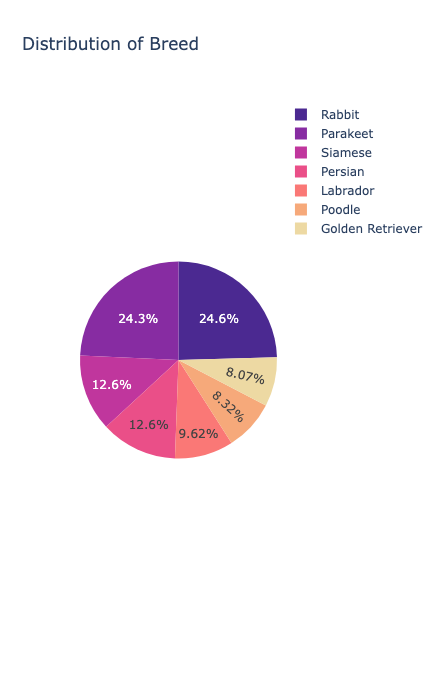

In [128]:
content_type = df.groupby(['Breed']).size().reset_index(name='counts')
content_type
# Ploting Distribution of content ratings on Netflix
fig = px.pie(content_type, names = 'Breed',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Breed',height =  700 , width = 900)
fig.show()

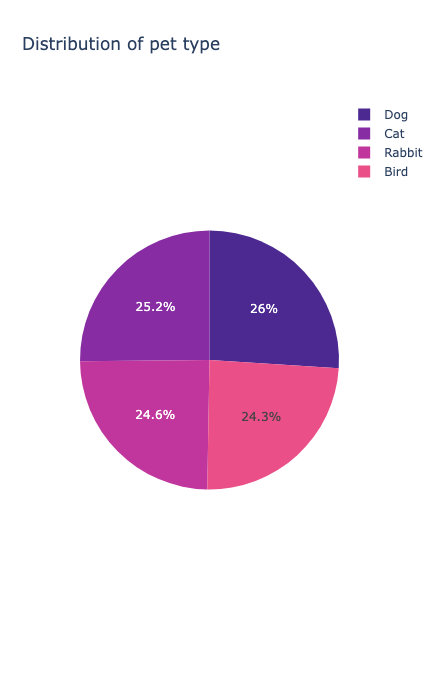

In [129]:
content_type = df.groupby(['PetType']).size().reset_index(name='counts')
content_type
# Ploting Distribution of content ratings on Netflix
fig = px.pie(content_type, names = 'PetType',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of pet type',height =  700 , width = 900)
fig.show()

In [130]:
df.AdoptionLikelihood.hist()
plt.ylabel('Count')
plt.xlabel('Adoption Likelihood')

Text(0.5, -10.075000000000001, 'Adoption Likelihood')

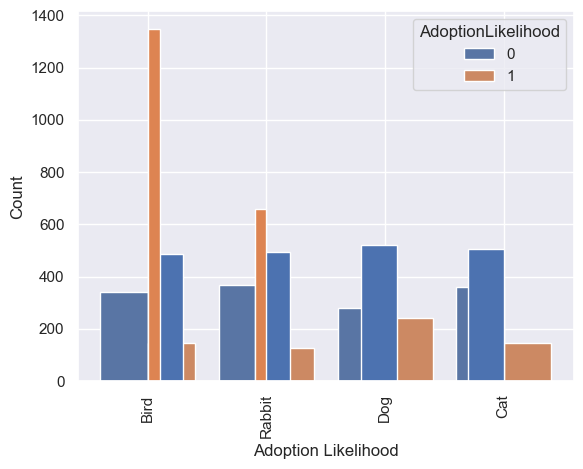

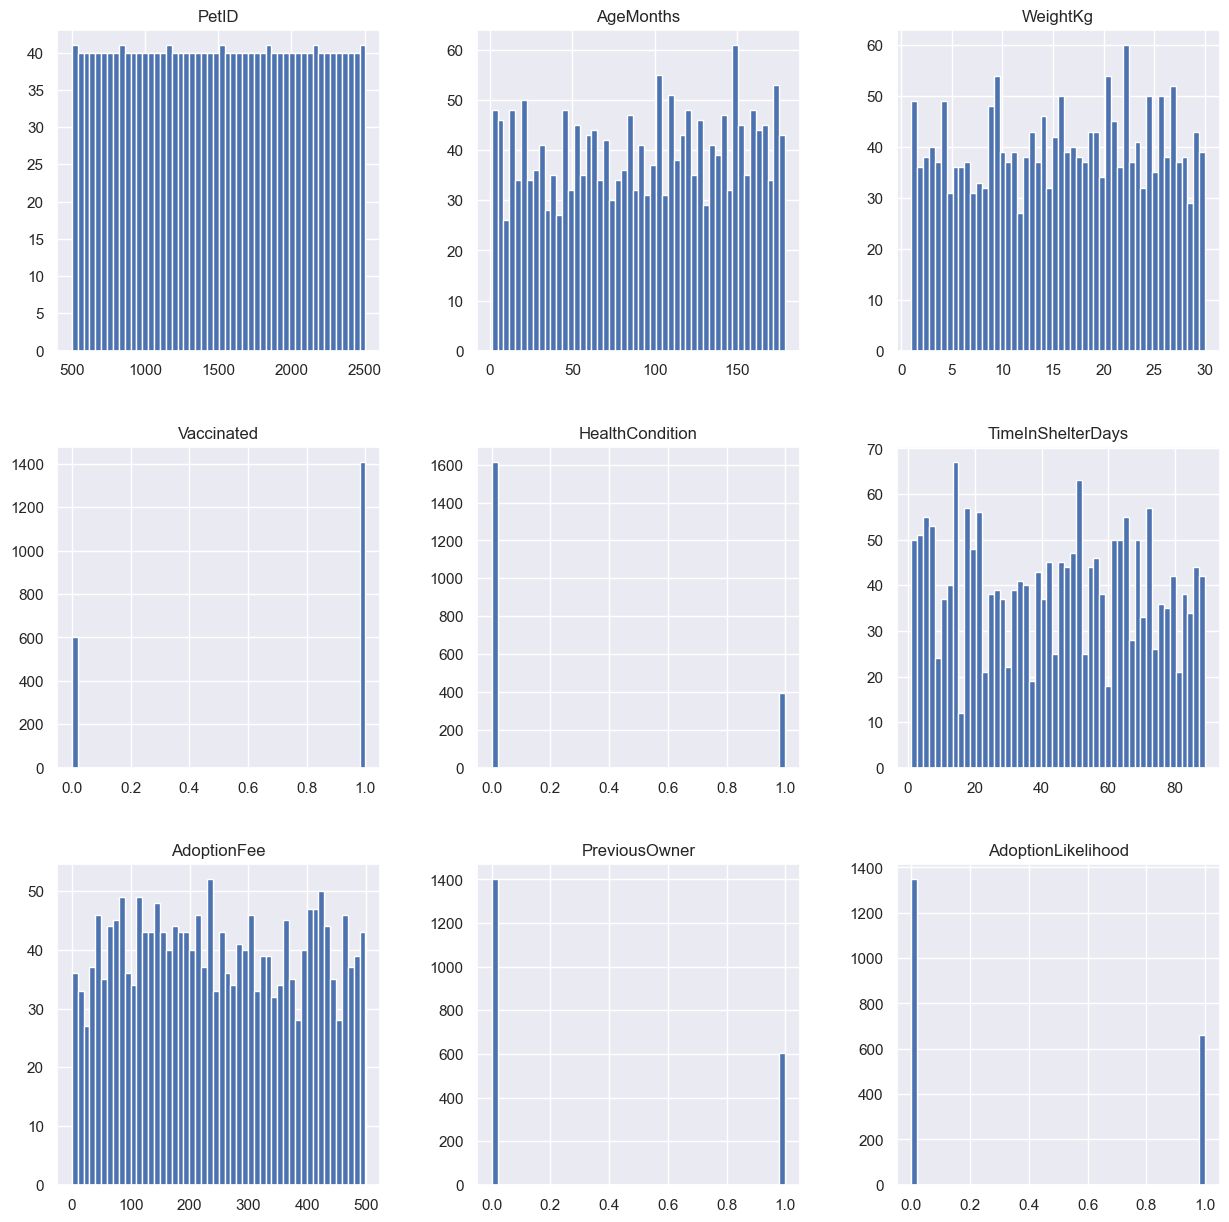

In [131]:
df.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

In [132]:
sns.countplot(x = df['PetType'],  hue = df['AdoptionLikelihood'])
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Bird'),
  Text(1, 0, 'Rabbit'),
  Text(2, 0, 'Dog'),
  Text(3, 0, 'Cat')])

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Feature Engineering 📝</b></div>

In [134]:
target=df['AdoptionLikelihood']
target

0       0
1       0
2       0
3       0
4       0
       ..
2002    1
2003    0
2004    0
2005    0
2006    0
Name: AdoptionLikelihood, Length: 2007, dtype: int64

In [135]:
df=df.drop('AdoptionLikelihood', axis=1)

In [136]:
Numerical_col=[]
Categorical_col=[]
for feature in df.columns:
    if df[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

In [137]:
Categorical_col

['PetType', 'Breed', 'Color', 'Size']

In [138]:
df["PetType"]=df["PetType"].map({"Bird":0,"Rabbit":1,"Dog":2,"Cat":3})

In [139]:
df["Size"]=df["Size"].map({"Small":0,"Large":1,"Medium":2})

In [140]:
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
0,500,0,Parakeet,131,Orange,1,5.039768,1,0,27,140,0
1,501,1,Rabbit,73,White,1,16.086727,0,0,8,235,0
2,502,2,Golden Retriever,136,Orange,2,2.076286,0,0,85,385,0
3,503,0,Parakeet,97,White,0,3.339423,0,0,61,217,1
4,504,1,Rabbit,123,Gray,1,20.498100,0,0,28,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,Poodle,72,Orange,0,27.039045,1,0,66,26,1
2003,2503,1,Rabbit,124,Brown,0,4.726954,1,1,59,150,0
2004,2504,1,Rabbit,113,Orange,0,1.758592,1,0,68,302,0
2005,2505,2,Labrador,12,Gray,1,20.961592,1,0,59,478,0


In [141]:
df=pd.get_dummies(df, columns=['Breed', 'Color'], drop_first=True)

In [142]:
df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,1,5.039768,1,0,27,140,0,False,True,False,False,False,False,False,False,True,False
1,501,1,73,1,16.086727,0,0,8,235,0,False,False,False,False,True,False,False,False,False,True
2,502,2,136,2,2.076286,0,0,85,385,0,False,False,False,False,False,False,False,False,True,False
3,503,0,97,0,3.339423,0,0,61,217,1,False,True,False,False,False,False,False,False,False,True
4,504,1,123,1,20.498100,0,0,28,14,1,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,72,0,27.039045,1,0,66,26,1,False,False,False,True,False,False,False,False,True,False
2003,2503,1,124,0,4.726954,1,1,59,150,0,False,False,False,False,True,False,True,False,False,False
2004,2504,1,113,0,1.758592,1,0,68,302,0,False,False,False,False,True,False,False,False,True,False
2005,2505,2,12,1,20.961592,1,0,59,478,0,True,False,False,False,False,False,False,True,False,False


In [143]:
List=["Breed_Labrador","Breed_Parakeet","Breed_Persian","Breed_Poodle","Breed_Siamese","Breed_Rabbit","Color_Brown",
     "Color_Gray","Color_Orange","Color_White"]

In [144]:
df[List]=df[List].astype(int)

In [145]:
df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,1,5.039768,1,0,27,140,0,0,1,0,0,0,0,0,0,1,0
1,501,1,73,1,16.086727,0,0,8,235,0,0,0,0,0,1,0,0,0,0,1
2,502,2,136,2,2.076286,0,0,85,385,0,0,0,0,0,0,0,0,0,1,0
3,503,0,97,0,3.339423,0,0,61,217,1,0,1,0,0,0,0,0,0,0,1
4,504,1,123,1,20.498100,0,0,28,14,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,72,0,27.039045,1,0,66,26,1,0,0,0,1,0,0,0,0,1,0
2003,2503,1,124,0,4.726954,1,1,59,150,0,0,0,0,0,1,0,1,0,0,0
2004,2504,1,113,0,1.758592,1,0,68,302,0,0,0,0,0,1,0,0,0,1,0
2005,2505,2,12,1,20.961592,1,0,59,478,0,1,0,0,0,0,0,0,1,0,0


In [146]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[-1.73118802, -1.36664934,  0.74269116, ..., -0.49890983,
         1.97663615, -0.51444172],
       [-1.72946201, -0.46793858, -0.36979735, ..., -0.49890983,
        -0.50591   ,  1.94385479],
       [-1.727736  ,  0.43077217,  0.83859535, ..., -0.49890983,
         1.97663615, -0.51444172],
       ...,
       [ 1.727736  , -0.46793858,  0.39743611, ..., -0.49890983,
         1.97663615, -0.51444172],
       [ 1.72946201,  0.43077217, -1.53982838, ...,  2.00437023,
        -0.50591   , -0.51444172],
       [ 1.73118802, -0.46793858,  0.64678698, ..., -0.49890983,
        -0.50591   ,  1.94385479]])

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,target,test_size=0.2, random_state=42)

In [148]:
len(X_train)

1605

In [149]:
len(X_test)

402

<a id="6"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Build Model 🎯</b></div>

In [151]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape
input_shape = (20,) # Example input shape

# Create the sequential model
model = tf.keras.Sequential([
    tf.keras.Input(shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

<a id="7"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Evaluation ✅</b></div>

In [154]:
y_pred_ANN=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [155]:
y_pred_ANN=y_pred_ANN.round().astype(int)


In [203]:
from sklearn.metrics import classification_report,confusion_matrix
print('ANN Classification Report :\n', classification_report(y_test,y_pred_ANN))
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Evaluate the Gradient Boosting model
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gbc))

# Display the confusion matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix:\n", cm_gbc)


ANN Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.43      0.52       270
           1       0.31      0.52      0.39       132

    accuracy                           0.46       402
   macro avg       0.48      0.48      0.45       402
weighted avg       0.54      0.46      0.48       402

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       270
           1       0.91      0.93      0.92       132

    accuracy                           0.95       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.95      0.95      0.95       402

Confusion Matrix:
 [[258  12]
 [  9 123]]


In [157]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_ANN)
cm

array([[117, 153],
       [ 63,  69]], dtype=int64)

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

Text(54.75, 0.5, 'Truth')

![pets](https://64.media.tumblr.com/2e5672bd34df086c8beb1b2c0927a6f2/tumblr_o9ns43M3Qq1rpu8e5o1_1280.png)


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       270
           1       0.91      0.93      0.92       132

    accuracy                           0.95       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.95      0.95      0.95       402

Confusion Matrix:
 [[258  12]
 [  9 123]]
